# Taxi Game with Gymnasium

Authors : Yana RAGOZINA - Thomas PAUL

## Imports

In [3]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt


## Introduction

In this exercise we seek to implement an agent capable of playing a simple Taxi game.

The game consists of a 5×5 matrix containing our taxi and four different cabstands labeled with letters. Also, there are some walls in the environment that our taxi can’t pass. The task of the game is to pick up passengers at one of the cabstands and carry them to their destinations

To do that, our agent has six possible actions to choose from. He can go north, south, east or
west and he can try to pick up or drop off a passenger. This is called the action space of our
taxi. Besides the action space we also have to define the state space. As we have 5 * 5 taxi
locations, 5 different passenger locations (because we have to include the passenger being in
our taxi) and 4 different destinations, the total number of states is 5 * 5 * 5 * 4 = 500.

Performing actions rewards the agent with points. He receives 20 points for a successful
drop-off and loses 1 point for every time-step it takes. The latter results in our agent trying to
solve the task fairly quick and prevents him from wandering around. There is also a -10 point
penalty for illegal pick-up and drop-off actions and -1 penalty for driving against a wall.

*Source : T. Da Silva Barros*

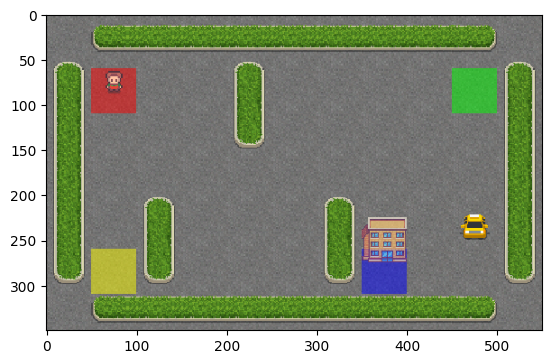

In [4]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.reset()
plt.imshow(env.render())

There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

More INFO: https://www.gymlibrary.dev/environments/toy_text/taxi/

## Q-Learning agent

In [5]:
# retrieve the game's configuration
state_space = env.observation_space.n
print("State space :", state_space)

action_space = env.action_space.n
print("Action space :", action_space)

qtable = np.zeros((state_space, action_space))
print("Q-table shape :", qtable.shape)

State space : 500
Action space : 6
Q-table shape : (500, 6)


For this configuration, we implement a Q-Learning model as follows :

In [6]:
# Hyper-parameters
epsilon = 1.0 # exploration first

epsilon_min = 0.005

epsilon_decay = 0.99993

episodes = 50000

max_steps = 100

learning_rate = 0.65

gamma = 0.65

In [7]:
value = qtable[5, 5]
print(value)

0.0


In [8]:
fscore = 0
for episode in range(episodes):
    state = env.reset()[0] #resets game before every episode
    done = False
    score = 0

    for _ in range(max_steps):

        # Take the best action in the Q-table
        if random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state, :])
        # Take a random action
        else:
            action = env.action_space.sample()

        next_state, reward, done, _, _ = env.step(action)
        
        score += reward

        qtable[state, action] = (1 - learning_rate) * qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[next_state, :]))

        state = next_state

        if done:
            print("episode ", episode, " score = ", score)
            fscore += score
            break
    
    if epsilon >= epsilon_min:
        epsilon *= epsilon_decay

print("AVERAGE SCORE = ", int(fscore / episodes))


episode  49  score =  -348
episode  112  score =  -191
episode  148  score =  -112
episode  197  score =  -250
episode  222  score =  -66
episode  229  score =  -34
episode  232  score =  -180
episode  238  score =  -207
episode  266  score =  -288
episode  300  score =  -321
episode  324  score =  -86
episode  341  score =  -256
episode  343  score =  -244
episode  356  score =  -311
episode  435  score =  -245
episode  508  score =  -249
episode  529  score =  -394
episode  556  score =  -234
episode  577  score =  -267
episode  581  score =  -124
episode  627  score =  -357
episode  635  score =  -293
episode  658  score =  -335
episode  661  score =  -211
episode  677  score =  -170
episode  705  score =  -134
episode  743  score =  -282
episode  756  score =  -282
episode  761  score =  -61
episode  779  score =  -375
episode  789  score =  -160
episode  806  score =  -266
episode  811  score =  -182
episode  823  score =  -78
episode  829  score =  -292
episode  839  score =  -25

The model does not obtain sufficient results. Thus, we can still observe that the model converges with 50000 episodes. For example, it passes from negative scores in the beginning (ex: -348) to positive scores by the end of the episodes range, meaning that the agent still manages to learn.

## Random actions

For this version we don't need a Q-table. The agent will perform random actions until the final state is reached.

In [9]:
fscore = 0
for episode in range(episodes):
    state = env.reset()[0] #resets game before every episode
    done = False
    score = 0

    for _ in range(max_steps):

        action = env.action_space.sample()

        next_state, reward, done, _, _ = env.step(action)
        
        score += reward

        state = next_state

        if done:
            print("episode ", episode, " score = ", score)
            fscore += score
            break

print("AVERAGE SCORE = ", int(fscore / episodes))

episode  21  score =  -290
episode  36  score =  -294
episode  42  score =  -62
episode  66  score =  -317
episode  102  score =  -439
episode  123  score =  -88
episode  145  score =  -387
episode  339  score =  -85
episode  366  score =  -83
episode  527  score =  -94
episode  533  score =  -165
episode  642  score =  -189
episode  719  score =  -117
episode  794  score =  -262
episode  841  score =  -249
episode  846  score =  -27
episode  1013  score =  -240
episode  1051  score =  -315
episode  1143  score =  -255
episode  1202  score =  -131
episode  1233  score =  -141
episode  1362  score =  -296
episode  1386  score =  -264
episode  1618  score =  -181
episode  1674  score =  -294
episode  1812  score =  -302
episode  1869  score =  -316
episode  1934  score =  -145
episode  1941  score =  -279
episode  1966  score =  -150
episode  2084  score =  -196
episode  2122  score =  -332
episode  2311  score =  -305
episode  2324  score =  -281
episode  2347  score =  -308
episode  23

We observe still an unsufficient score for the random agent. Yet, the average score is better than the average score of a Q-Learning agent.

## Results

After comparing an agent that takes ranom actions and a Q-Learning agent, we can observe slightly better performances with the random agent, even if the Q-Leaning model seems to converge globally (We can suggest to increase the number of episodes to let the model converge more. We could also modify the model's parameters in order to favorise exploitation or increase learning rate for example). 
Over 50000 episodes, both models obtain an average negative score. Random agent obtains -3 and the Q-Learning agent earns -17.

Still, the inconvenient of the random method lies in its runtime, taking approximately 3 times longer to execute than the Q-Learning agent (3 minutes versus 1 minute approximately).